## Nonlinear Galaxy Bias (based on Nicola et al. 2023)

We take nonlinear galaxy bias modeling on the publicly available fits from Nicola et al. (2023) (arXiv:2307.03226), which provides galaxy bias parameters derived from the HSC (Hyper Suprime-Cam) survey. 

In [1]:
import requests
import os

# Create the target directory
target_dir = "external_data/catalogs"
os.makedirs(target_dir, exist_ok=True)

# Define files and their Zenodo download URLs
files_to_download = {
    "biases_red.npy": "https://zenodo.org/records/15375051/files/biases_red.npy?download=1",
    "biases_HSC.npy": "https://zenodo.org/records/15375051/files/biases_HSC.npy?download=1"
}

# Download each file if it's not already present
for filename, url in files_to_download.items():
    target_path = os.path.join(target_dir, filename)
    if not os.path.exists(target_path):
        print(f"Downloading {filename} from Zenodo...")
        r = requests.get(url)
        with open(target_path, "wb") as f:
            f.write(r.content)
    else:
        print(f"File already exists at: {target_path}")

File already exists at: external_data/catalogs/biases_red.npy
File already exists at: external_data/catalogs/biases_HSC.npy


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
bias_hsc = np.load('external_data/catalogs/biases_HSC.npy', allow_pickle=True)

In [4]:
print('Linear bias correction in HSC LPT:')
bias_hsc.item()['b1p_LPT']

Linear bias correction in HSC LPT:


array([0.80076896, 0.94882797, 0.89977444, 0.84523193, 1.03596023])

In [5]:
bias_red = np.load('external_data/catalogs/biases_red.npy', allow_pickle=True)

In [6]:
# bias_hsc is a 0-d array containing a dict; use .item() to get the dict
# info that we need
hsc_keys = ['z_arr', 'b1_LPT', 'b1_err_LPT', 'b1p_LPT', 'b1p_err_LPT', 'b2_LPT', 'b2_err_LPT', 'bs_LPT', 'bs_err_LPT', 'bk2_LPT', 'bk2_err_LPT', 'Psn_LPT', 'Psn_err_LPT']
bias_red_keys = hsc_keys + ['b1_BACCO', 'b1_err_BACCO', 'b1p_BACCO', 'b1p_err_BACCO', 'b2_BACCO', 'b2_err_BACCO', 'bs_BACCO', 'bs_err_BACCO', 'bk2_BACCO', 'bk2_err_BACCO', 'Psn_BACCO', 'Psn_err_BACCO']

In [7]:
                   
# Plot style
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette("Paired")) 
from matplotlib import rc
rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Times']})

plt.rc('mathtext', fontset='stix')
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('font',size=20)
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=20)
plt.rc('lines', linewidth=2)
plt.rc('lines', markersize=2)
plt.rc('legend', fontsize=18)    

/var/folders/h4/nm88s1d55cb19yw7pxm0tzs40000gn/T/ipykernel_47388/4253182611.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend(fontsize=13, frameon=False, loc="best")


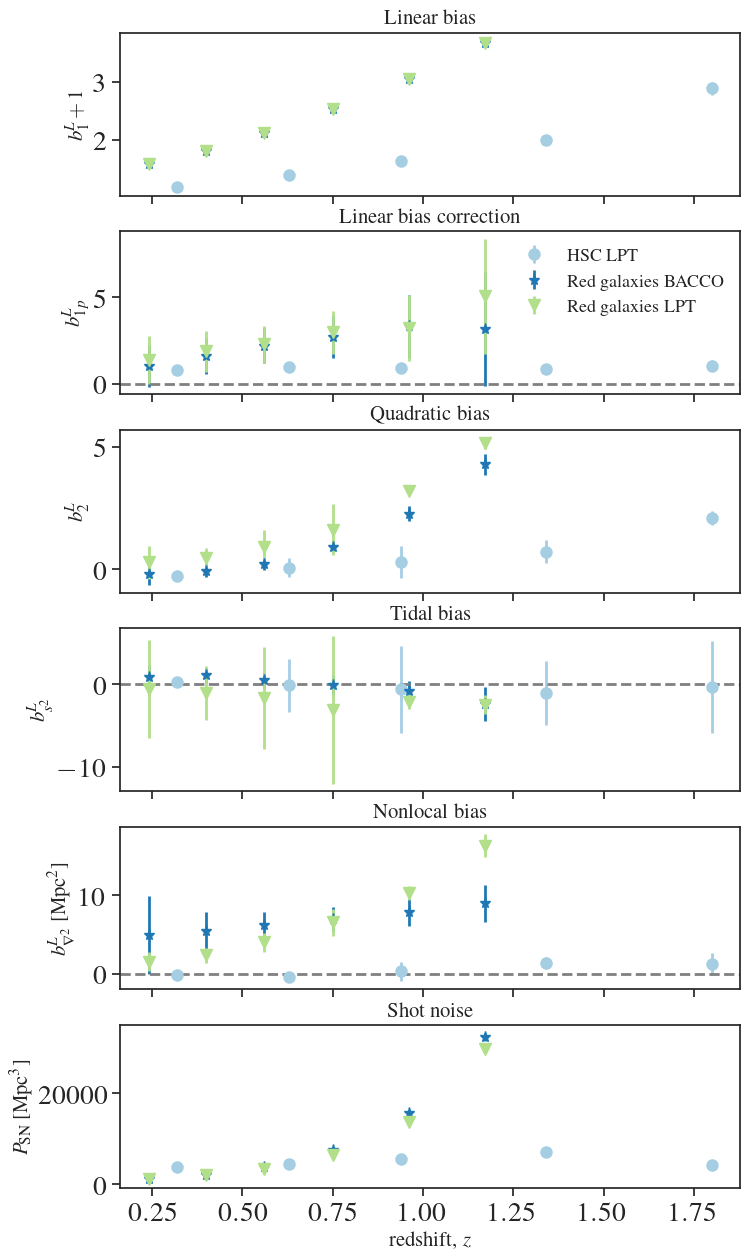

In [8]:
marker_size=8 

parameters = ['b1', 'b1p', 'b2', 'bs', 'bk2', 'Psn']

# LaTeX formatting and descriptions
latex_map = {
    "b1": r"$b_1^L+1$",
    "b1p": r"$b_{1p}^L$",
    "b2": r"$b_2^L$",
    "bs": r"$b_{s^2}^L$",
    "bk2": r"$b_{\nabla^2}^L$ [Mpc$^2$]",
    "Psn": r"$P_{\rm SN}$ [Mpc$^3$]"
}

titles = {
    "b1": "Linear bias",
    "b1p": "Linear bias correction",
    "b2": "Quadratic bias",
    "bs": "Tidal bias",
    "bk2": "Nonlocal bias",
    "Psn": "Shot noise"
}

# Setup figure
fig, axs = plt.subplots(len(parameters), 1, figsize=(8, len(parameters) * 2.5), sharex=True)


for i, param in enumerate(parameters):
    plotted = False
    latex_param = latex_map.get(param, f"${param}$")
    desc = titles.get(param, param)


    if param in parameters:
        axs[i].errorbar(bias_hsc.item()['z_arr'], bias_hsc.item()[param+'_LPT'], yerr=bias_hsc.item()[param+'_err_LPT'],
                    marker='o',  markersize=marker_size, linestyle='', label='HSC LPT')
        axs[i].errorbar(bias_red.item()['z_arr'], bias_red.item()[param+'_BACCO'], yerr=bias_red.item()[param+'_err_BACCO'],
                    marker='*',  markersize=marker_size, linestyle='', label='Red galaxies BACCO')
        axs[i].errorbar(bias_red.item()['z_arr'], bias_red.item()[param+'_LPT'], yerr=bias_red.item()[param+'_err_LPT'],
                    marker='v', markersize=marker_size, linestyle='', label='Red galaxies LPT')
        if param == 'bs' or param == 'bk2'or param == 'b1p':
            axs[i].axhline(y=0, color='gray', linestyle='--', linewidth=2)
        
        plotted = True



    axs[i].set_ylabel(latex_param, fontsize=15)
    axs[i].set_title(desc, fontsize=15, loc='center', pad=7)

    if plotted:
        axs[1].legend(fontsize=13, frameon=False, loc="best")

axs[-1].set_xlabel('redshift, $z$', fontsize=15)
plt.subplots_adjust(hspace=0.22)

In [9]:
DESC_Y1 = {'z_arr': np.array([0.3171, 0.5056, 0.6999, 0.896, 1.0929]), 'b1': np.array([1.1877, 1.3124, 1.4512, 1.6063, 1.7794]),  'b2': np.array([-0.2644, -0.0691, 0.1159, 0.2673, 0.4648]), 'bs': np.array([0.2255, 0.0074, -0.2524, -0.5711, -0.8122]), 'bk2': np.array([-0.2003, -0.3127, -0.2306, 0.2119, 0.7229])}
DESC_Y10 = {'z_arr': np.array([0.2627, 0.3587, 0.4563, 0.5547, 0.6534, 0.7522, 0.8513, 0.9504, 1.0495, 1.1486]), 'b1': np.array([1.1877, 1.2137, 1.2793, 1.3454, 1.4145, 1.4926, 1.5709, 1.6504, 1.7401, 1.8298]),  'b2': np.array([-0.2644, -0.2237, -0.1209, -0.0174, 0.0800, 0.1563, 0.2328, 0.3123, 0.4183, 0.5243]), 'bs': np.array([0.2255, 0.1800, 0.0652, -0.0504, -0.1769, -0.3375, -0.4984, -0.6540, -0.7640, -0.8740]), 'bk2': np.array([-0.2003, -0.2237, -0.2829, -0.3424, -0.3354, -0.1124, 0.1109, 0.3389, 0.6058, 0.8728])}

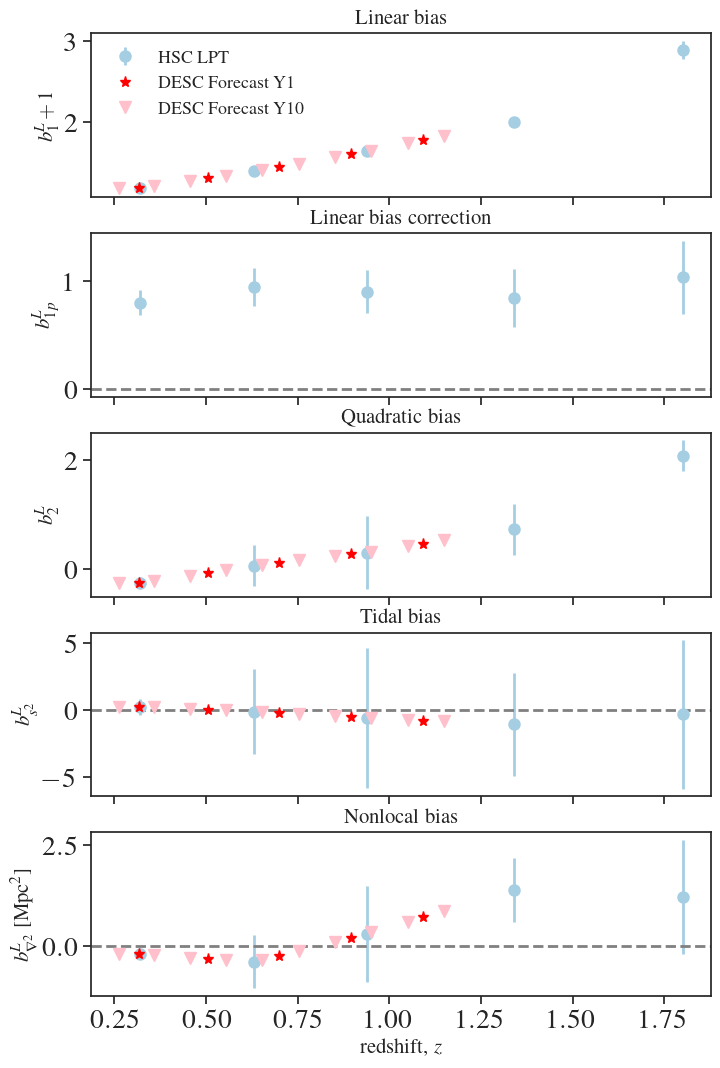

In [11]:
parameters = ['b1', 'b1p', 'b2', 'bs', 'bk2']

# Setup figure
fig, axs = plt.subplots(len(parameters), 1, figsize=(8, len(parameters) * 2.5), sharex=True)

for i, param in enumerate(parameters):
    plotted = False
    latex_param = latex_map.get(param, f"${param}$")
    desc = titles.get(param, param)


    if param in parameters:
        axs[i].errorbar(bias_hsc.item()['z_arr'], bias_hsc.item()[param+'_LPT'], yerr=bias_hsc.item()[param+'_err_LPT'],
                    marker='o',  markersize=marker_size, linestyle='', label='HSC LPT')
        if param in DESC_Y1 and param in DESC_Y10:
            axs[i].errorbar(DESC_Y1['z_arr'], DESC_Y1[param], 
                    marker='*',  markersize=marker_size, linestyle='', color='red', label='DESC Forecast Y1')
            axs[i].errorbar(DESC_Y10['z_arr'], DESC_Y10[param], 
                    marker='v', markersize=marker_size, linestyle='', color='pink', label='DESC Forecast Y10')
        if param == 'bs' or param == 'bk2'or param == 'b1p':
            axs[i].axhline(y=0, color='gray', linestyle='--', linewidth=2)
        
        plotted = True



    axs[i].set_ylabel(latex_param, fontsize=15)
    axs[i].set_title(desc, fontsize=15, loc='center', pad=7)

    if plotted:
        axs[0].legend(fontsize=13, frameon=False, loc="best")

axs[-1].set_xlabel('redshift, $z$', fontsize=15)
plt.subplots_adjust(hspace=0.22)

# Two things to notice: 
### a) DESC Forecasts ignore $b_{1p}$ from $b_1^L(z)=b_1^L+b^l_{1p}(z-\bar{z})$;
### b) In the red galaxy sample BACCO and LPT differ for all higher-order bias parameters at higher $z$;

---------------------------------------------------------------------------------------------------------

# Bias relations
Check bias-relations from Zennaro et al 2022 paper. 
* See Table 3 in https://arxiv.org/pdf/2110.05408
* Lazeyras et al 2016 in Eulerean bias: $b_2(b_1)=0.412-2.143b_1+0.929 b_2^2+0.008b_1^3$ with Sheth et al 2013 trlation for Lagrangian $b_2^L=[b_2-8/21(b_1-1)]/2$;
* Excuresion set formalism in Eulerean from Sheth et al 2013: $b_{s^2}=0.524-0.547b_1+0.046b_1^2$ and then Lagrangian counterpart from Desjacques et al 2016: $b_{s^2}^L=b_{s^2}+2/7(b_1-1)$

### Transformtaion of the bias parameters from Andrina's/DESC values to BACCO/Zennaro22/MGL values:

$b_1^{BACCO}=b_1^L$, $b_2^{BACCO}=b_2^L/2$, $b_{s^2}^{BACCO}=b_{s^2}^L/2$, $b_{\nabla^2}^{BACCO}[\mathrm{Mpc}^2/h^2]=b_{\nabla^2}^L[\mathrm{Mpc}]/2/h^2$

Not sure we have to do anything about [Mpc] to [Mpc/h] in $b_{\nabla^2}^L$ since we can match power spectra in CCL and MGL/BACCO pretty well... 

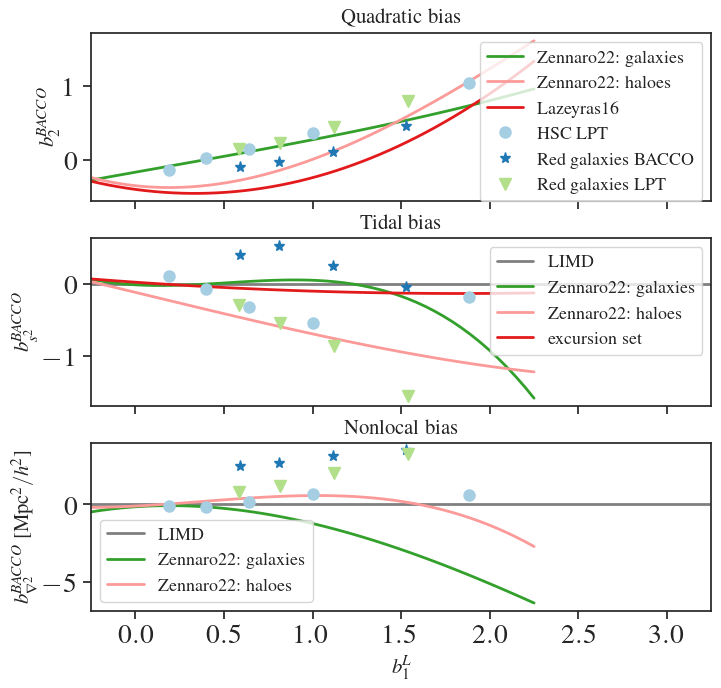

In [12]:
parameters = ['b2', 'bs', 'bk2']
# LaTeX formatting and descriptions
latex_map = {
    "b2": r"$b_2^{BACCO}$",
    "bs": r"$b_{s^2}^{BACCO}$",
    "bk2": r"$b_{\nabla^2}^{BACCO}$ [Mpc$^2/h^2$]",
}
b1L = np.linspace(-0.25, 2.25)
# Setup figure
fig, axs = plt.subplots(len(parameters), 1, figsize=(8, len(parameters) * 2.5), sharex=True)

for i, param in enumerate(parameters):
    plotted = False
    latex_param = latex_map.get(param, f"${param}$")
    desc = titles.get(param, param)


    if param in parameters:
        axs[i].errorbar(bias_hsc.item()['b1_LPT']-1, bias_hsc.item()[param+'_LPT']/2., #yerr=bias_hsc.item()[param+'_err_LPT']/2., xerr=bias_hsc.item()['b1_err_LPT'],
                    marker='o',  markersize=marker_size, linestyle='', label='HSC LPT' if i==0 else '')
        axs[i].errorbar(bias_red.item()['b1_BACCO'][:4]-1, bias_red.item()[param+'_BACCO'][:4]/2, #yerr=bias_red.item()[param+'_err_BACCO'], xerr=bias_red.item()['b1_err_BACCO'],
                    marker='*',  markersize=marker_size, linestyle='', label='Red galaxies BACCO' if i==0 else '')
        axs[i].errorbar(bias_red.item()['b1_LPT'][:4]-1, bias_red.item()[param+'_LPT'][:4]/2., #yerr=bias_red.item()[param+'_err_LPT'], xerr=bias_red.item()['b1_err_LPT'],
                    marker='v',  markersize=marker_size, linestyle='', label='Red galaxies LPT' if i==0 else '')

        if param == 'bs' or param == 'bk2':
            axs[i].axhline(y=0, color='gray', linestyle='-', linewidth=2, label='LIMD')
        
        plotted = True

    if i==0:
        axs[0].plot(b1L, 0.01677*b1L**3-0.005116*b1L**2+0.4279*b1L-0.1635, label='Zennaro22: galaxies')
        axs[0].plot(b1L, -0.09143*b1L**3+0.7093*b1L**2-0.2607*b1L-0.3469, label='Zennaro22: haloes')
        axs[0].plot(b1L, (0.412-2.143*(b1L+1)+0.929*(b1L+1)**2+0.008*(b1L+1)**3-8./21*b1L)/2., label='Lazeyras16')
    if i==1:
        axs[1].plot(b1L, -0.3605*b1L**3+0.5649*b1L**2-0.1412*b1L-0.01318, label='Zennaro22: galaxies')
        axs[1].plot(b1L, 0.02278*b1L**3-0.005503*b1L**2-0.5904*b1L-0.1174, label='Zennaro22: haloes')
        axs[1].plot(b1L, 0.524 - 0.547 * (b1L+1) + 0.046 * (b1L+1)**2 + 2./7.* b1L, label='excursion set')
    if i==2:
        axs[2].plot(b1L,0.2298*b1L**3-2.096*b1L**2+0.7816*b1L-0.1545, label='Zennaro22: galaxies')
        axs[2].plot(b1L, -0.6971*b1L**3+0.7892*b1L**2+0.5882*b1L-0.1072, label='Zennaro22: haloes')



    axs[i].set_ylabel(latex_param, fontsize=15)
    axs[i].set_title(desc, fontsize=15, loc='center', pad=7)
    axs[i].set_xlim(-0.25, 3.25)

    if plotted:
        axs[i].legend(fontsize=13, frameon=True, loc="best")

axs[-1].set_xlabel('$b_1^{L}$', fontsize=15)
plt.subplots_adjust(hspace=0.22)


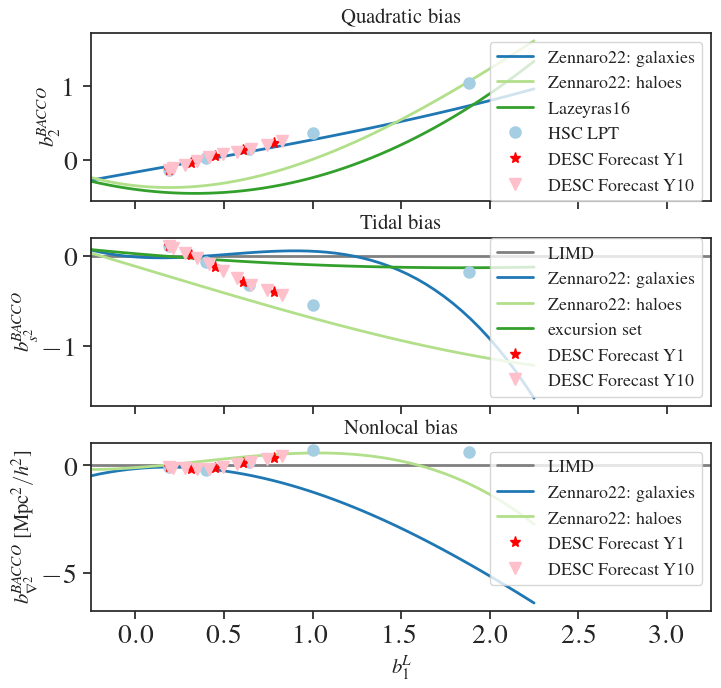

In [13]:
# Setup figure
fig, axs = plt.subplots(len(parameters), 1, figsize=(8, len(parameters) * 2.5), sharex=True)

for i, param in enumerate(parameters):
    plotted = False
    latex_param = latex_map.get(param, f"${param}$")
    desc = titles.get(param, param)


    if param in parameters:
        axs[i].errorbar(bias_hsc.item()['b1_LPT']-1, bias_hsc.item()[param+'_LPT']/2., #yerr=bias_hsc.item()[param+'_err_LPT']/2., xerr=bias_hsc.item()['b1_err_LPT'],
                    marker='o',  markersize=marker_size, linestyle='', label='HSC LPT' if i==0 else '')
        axs[i].errorbar(DESC_Y1['b1']-1., DESC_Y1[param]/2, 
                    marker='*',  markersize=marker_size, linestyle='', color='red', label='DESC Forecast Y1')
        axs[i].errorbar(DESC_Y10['b1']-1., DESC_Y10[param]/2, 
                    marker='v', markersize=marker_size, linestyle='', color='pink', label='DESC Forecast Y10')
        if param == 'bs' or param == 'bk2':
            axs[i].axhline(y=0, color='gray', linestyle='-', linewidth=2, label='LIMD')
        
        plotted = True

    if i==0:
        axs[0].plot(b1L, 0.01677*b1L**3-0.005116*b1L**2+0.4279*b1L-0.1635, label='Zennaro22: galaxies')
        axs[0].plot(b1L, -0.09143*b1L**3+0.7093*b1L**2-0.2607*b1L-0.3469, label='Zennaro22: haloes')
        axs[0].plot(b1L, (0.412-2.143*(b1L+1)+0.929*(b1L+1)**2+0.008*(b1L+1)**3-8./21*b1L)/2., label='Lazeyras16')
    if i==1:
        axs[1].plot(b1L, -0.3605*b1L**3+0.5649*b1L**2-0.1412*b1L-0.01318, label='Zennaro22: galaxies')
        axs[1].plot(b1L, 0.02278*b1L**3-0.005503*b1L**2-0.5904*b1L-0.1174, label='Zennaro22: haloes')
        axs[1].plot(b1L, 0.524 - 0.547 * (b1L+1) + 0.046 * (b1L+1)**2 + 2./7.* b1L, label='excursion set')
    if i==2:
        axs[2].plot(b1L, 0.2298*b1L**3-2.096*b1L**2+0.7816*b1L-0.1545, label='Zennaro22: galaxies')
        axs[2].plot(b1L, -0.6971*b1L**3+0.7892*b1L**2+0.5882*b1L-0.1072, label='Zennaro22: haloes')



    axs[i].set_ylabel(latex_param, fontsize=15)
    axs[i].set_title(desc, fontsize=15, loc='center', pad=7)
    axs[i].set_xlim(-0.25, 3.25)

    if plotted:
        axs[i].legend(fontsize=13, frameon=True, loc="best")

axs[-1].set_xlabel('$b_1^{L}$', fontsize=15)
plt.subplots_adjust(hspace=0.22)

# Two things to notice: 
### a) HSC is following $b_2$ relation for galaxies, but $b_{s^2}$ and $b_{\nabla^2}$ resembles haloes more;
### b) Similar woth the red galaxies, although BACCO fit follows Zennaro22 fit for galaxies instead of haloes in $b_{s^2}$.

---------------------------------------------------------------------------------------------------------

# CCL and BACCO matching

In [19]:
import pyccl as ccl
import baccoemu as bacco

In [20]:
params_bacco = {'Omega_m' : 0.31,
    'Omega_c'   : 0.31-0.05,
    'Omega_cb'  : 0.31,
    'omega_cold'    :  0.31, 
    'omega_baryon'  :  0.05,
    'sigma8_cb' : 0.83,
    'sigma8_cold'   :  0.83,
    'Omega_b'   : 0.05,
    'ns'        : 0.96,
    'h'         : 0.68,
    'hubble'        :  0.68,
    'Mnu'       : 0.0,
    'neutrino_mass' :  0.,
    'w0'        : -1.0,
    'wa'        : 0.0, 
    'b1L_1': 0.187684,
    'b1L_2': 0.312375,
    'b1L_3': 0.45121,
    'b1L_4': 0.60626,
    'b1L_5': 0.779385,
    'b2L_1': -0.1322075,
    'b2L_2': -0.0345375,
    'b2L_3': 0.0579305,
    'b2L_4': 0.133662,
    'b2L_5': 0.232387,
    'bs2L_1': 0.1127485,
    'bs2L_2': 0.0036835,
    'bs2L_3': -0.1261985,
    'bs2L_4': -0.285537,
    'bs2L_5': -0.406101,
    'blaplL_1': -0.100126,
    'blaplL_2': -0.1563475,
    'blaplL_3': -0.115281,
    'blaplL_4': 0.1059295,
    'blaplL_5': 0.361450,
}     

In [21]:
# CCL initialization
bemu_nl = ccl.BaccoemuNonlinear()
cosmo_nl = ccl.Cosmology(Omega_c=params_bacco['Omega_c'], 
                         Omega_b=params_bacco['Omega_b'], 
                         h=params_bacco['h'], 
                         n_s=params_bacco['ns'], 
                         sigma8=params_bacco['sigma8_cb'],
                         m_nu=params_bacco['Mnu'], 
                         w0=params_bacco['w0'],
                         wa=params_bacco['wa'],
                         Omega_k = 0.,
                         T_ncdm=0,
                         transfer_function='boltzmann_camb',
                         matter_power_spectrum=bemu_nl
                         )

Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...
Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


In [22]:
h = params_bacco['h']
min_k_in_Mpc = np.log10(2.e-4 * h)  
max_k_in_Mpc = np.log10(0.7 * h)
# compute HEFT Pgg and Pgl with CCL
# for values from params_bacco in the bin_i-redshift bin
heft = ccl.nl_pt.BaccoLbiasCalculator(cosmo=cosmo_nl, log10k_min=min_k_in_Mpc, log10k_max=max_k_in_Mpc, 
                                        nk_per_decade=20)
heft.update_ingredients(cosmo_nl)

# transformation from bacco to ccl as discussed above
bin_i = 4
b1L_ccl = params_bacco[f'b1L_{bin_i+1}']+1 #ccl takes b1L+1
b2L_ccl = params_bacco[f'b2L_{bin_i+1}']*2
bs2_ccl = params_bacco[f'bs2L_{bin_i+1}']*2
bLap_ccl = params_bacco[f'blaplL_{bin_i+1}']*2 #no Mpc/h to Mpc transformation on the level of blaplL
zz_bacco = np.linspace(0., 1.5, 256)

ptt_g_i = ccl.nl_pt.PTNumberCountsTracer(b1=(zz_bacco, b1L_ccl*np.ones(len(zz_bacco))), b2=(zz_bacco, b2L_ccl*np.ones(len(zz_bacco))), 
                                    bs=(zz_bacco, bs2_ccl*np.ones(len(zz_bacco))), bk2=(zz_bacco, bLap_ccl*np.ones(len(zz_bacco))))
ptt_g_j = ccl.nl_pt.PTNumberCountsTracer(b1=(zz_bacco, b1L_ccl*np.ones(len(zz_bacco))), b2=(zz_bacco, b2L_ccl*np.ones(len(zz_bacco))), 
                                    bs=(zz_bacco, bs2_ccl*np.ones(len(zz_bacco))), bk2=(zz_bacco, bLap_ccl*np.ones(len(zz_bacco))))
ptt_l_j = ccl.nl_pt.PTMatterTracer()
pk_gg_ccl = heft.get_biased_pk2d(tracer1=ptt_g_i, tracer2=ptt_g_j)
pk_gl_ccl = heft.get_biased_pk2d(tracer1=ptt_g_i, tracer2=ptt_l_j)

Loading l-bias lpt emulator...
L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...
Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...
Nonlinear l-bias emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.


In [23]:
# # compute HEFT Pgg and Pgl with BACCO
heftemulator = bacco.Lbias_expansion()
params_bacco['expfactor'] = 1./(1.+zz_bacco[::-1])
k, pnn = heftemulator.get_nonlinear_pnn(**params_bacco)
bL1_bacco = params_bacco[f'b1L_{bin_i+1}']
bL2_bacco = params_bacco[f'b2L_{bin_i+1}']
bs2_bacco = params_bacco[f'bs2L_{bin_i+1}']
blapl_bacco = params_bacco[f'blaplL_{bin_i+1}']

p_dmdm = pnn[0]        
p_dmd1 = pnn[1]
p_dmd2 = pnn[2]
p_dms2 = pnn[3]      
p_dmk2 = pnn[4]     
p_d1d1 = pnn[5]    
p_d1d2 = pnn[6]      
p_d1s2 = pnn[7]    
p_d1k2 = pnn[8]       
p_d2d2 = pnn[9]       
p_d2s2 = pnn[10] 
p_d2k2 = pnn[11]
p_s2s2 = pnn[12]
p_s2k2 = pnn[13] 
p_k2k2 = pnn[14] 

pgg_bacco = (p_dmdm +
        (bL1_bacco+bL1_bacco) * p_dmd1 +
        (bL1_bacco*bL1_bacco) * p_d1d1 +
        (bL2_bacco + bL2_bacco) * p_dmd2 +
        (bs2_bacco + bs2_bacco) * p_dms2 +
        (bL1_bacco*bL2_bacco + bL1_bacco*bL2_bacco) * p_d1d2 +
        (bL1_bacco*bs2_bacco + bL1_bacco*bs2_bacco) * p_d1s2 +
        (bL2_bacco*bL2_bacco) * p_d2d2 +
        (bL2_bacco*bs2_bacco + bL2_bacco*bs2_bacco) * p_d2s2 +
        (bs2_bacco*bs2_bacco)* p_s2s2 +
        (blapl_bacco + blapl_bacco) * p_dmk2 +
        (bL1_bacco * blapl_bacco + bL1_bacco * blapl_bacco) * p_d1k2 +
        (bL2_bacco * blapl_bacco + bL2_bacco * blapl_bacco) * p_d2k2 +
        (bs2_bacco* blapl_bacco + bs2_bacco * blapl_bacco) * p_s2k2+
        (blapl_bacco * blapl_bacco) * p_k2k2)

pgg_bacco = pgg_bacco[::-1]


Loading l-bias lpt emulator...


/Users/s2265800/miniforge3/envs/mgl_ccl_cloe_env/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/s2265800/miniforge3/envs/mgl_ccl_cloe_env/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...
Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...


/Users/s2265800/miniforge3/envs/mgl_ccl_cloe_env/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/s2265800/miniforge3/envs/mgl_ccl_cloe_env/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Nonlinear l-bias emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.


/Users/s2265800/miniforge3/envs/mgl_ccl_cloe_env/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/s2265800/miniforge3/envs/mgl_ccl_cloe_env/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/s2265800/miniforge3/envs/mgl_ccl_cloe_env/lib/python3.11/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle e

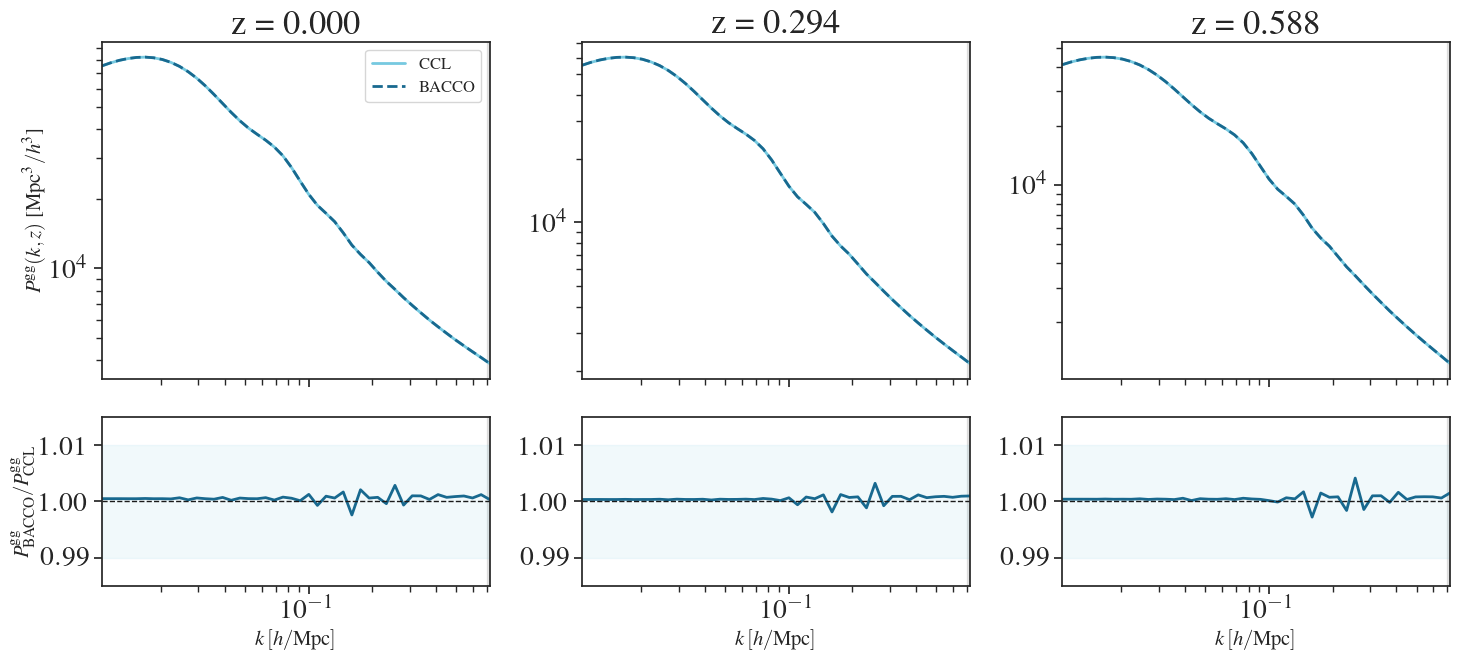

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7), facecolor='w', gridspec_kw={'height_ratios':[2,1] }, sharex=True)
for j, z_ind in enumerate([0, 50, 100]):
    pgg_ccl = pk_gg_ccl(k*params_bacco['h'], 1./(1.+zz_bacco[z_ind]), cosmo_nl)* params_bacco['h']**3
    ax[0][j].loglog(k, pgg_ccl, color="#76C9E0")
    ax[0][j].loglog(k, pgg_bacco[z_ind], color='#18698F', linestyle='--')
    #
    ax[1][j].plot(k, pgg_bacco[z_ind]/pgg_ccl, color='#18698F')
    ax[0][j].set_title(f'z = {zz_bacco[z_ind]:.3f}')
    ax[0][j].axvspan(0.7, k[-1], color='k', alpha=0.1, label='_nolegend_')
    
    ax[1][j].axhline(y=1.0, color='k', linestyle='--', linewidth=1)   
    ax[1][j].set_xlabel(r'$k\, [h/\rm Mpc]$', fontsize=15)
    ax[1][j].axvspan(0.7, k[-1], color='k', alpha=0.1, label='_nolegend_')
    ax[1][j].axhspan(0.99, 1.01, color='#76C9E0', alpha=0.1, label='_nolegend_')
    ax[1][j].set_xlim(k[0], k[-1])
    ax[1][j].set_ylim(0.985, 1.015)
legend = ['CCL', 'BACCO']
ax[0][0].legend(legend, fontsize=12)
ax[0][0].set_ylabel("$P^{\\rm gg}(k, z)$ [Mpc$^3/h^3$]", fontsize=15)
ax[1][0].set_ylabel("$P^{\\rm gg}_{\\rm BACCO}/P_{\\rm CCL}^{\\rm gg}$", fontsize=15)
plt.tight_layout()

# Compare with LPT prediction for the same values of the bias parameters
'velocileptors' seems to be incompatible with 'bacco': we're computing LPT-power spectrum in a different environemnt and save it into a text file for comparison